In [3]:
import pomegranate as pg

In [5]:
x0 = pg.DiscreteDistribution({0: 0.3, 1: 0.7})
x1 = pg.ConditionalProbabilityTable(
    [[0, 0, 0.2], [0, 1, 0.8], [1, 0, 0.7], [1, 1, 0.3]],
    [x0])

In [6]:
x2 = pg.ConditionalProbabilityTable(
    [[0, 0, 0.4], [0, 1, 0.6], [1, 0, 0.3], [1, 1, 0.7]],
    [x0])
x3 = pg.ConditionalProbabilityTable(
    [[0, 0,0, 0.2], [0,0, 1, 0.8], [0,1, 0, 0.3], [0,1, 1, 0.7],[1,0,0, 0.6],[1,0, 1, 0.4],[1,1, 0, 0.7],[1,1, 1, 0.3]],
    [x1,x2])

In [7]:
s1 = pg.Node(x0, name="x0")
s2 = pg.Node(x1, name="x1")
s3 = pg.Node(x2, name="x2")
s4 = pg.Node(x3, name="x3")

In [8]:
bn=pg.BayesianNetwork(name='fg')

In [9]:
bn.add_states(s1,s2,s3,s4)

In [10]:
bn.add_edge(s1,s2)
bn.add_edge(s1,s3)
bn.add_edge(s3,s4)
bn.add_edge(s2,s4)

In [11]:
bn.bake()

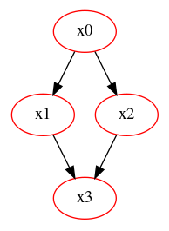

In [12]:
bn.plot()

In [13]:
factor_graph=bn.graph

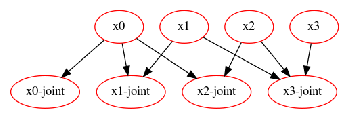

In [14]:
factor_graph.plot()

In [ ]:
#Note: x0-joint , x1-joint are the factors

In [15]:
print("\n".join( "{:10.10} : {}".format( state.name, belief.parameters[0] ) for state, belief in zip( factor_graph.states, factor_graph.predict_proba({}, max_iterations=100) ) ))

x0         : {0: 0.3000000000000003, 1: 0.6999999999999995}
x0-joint   : {0: 0.5499999999999997, 1: 0.4500000000000003}
x1         : {0: 0.3300000000000002, 1: 0.6699999999999997}
x1-joint   : {0: 0.4470000000000001, 1: 0.5529999999999999}


In [17]:
# factor_graph.predict_proba({})